In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [58]:
df = pd.read_excel("Delhi_new.xlsx")

In [59]:
df['PM2_5'] = df['PM2_5'].fillna(df['PM2_5'].mean())

In [60]:
df

,PM2_5,Date
0,232.22,2017-01-01
1,203.47,2017-01-02
2,287.74,2017-01-03
3,348.77,2017-01-04
4,239.70,2017-01-05
5,201.10,2017-01-06
6,150.97,2017-01-07
7,137.82,2017-01-08
8,146.32,2017-01-09
9,142.51,2017-01-10


In [1]:
df["Date"] = pd.to_datetime(df["Date"],format="%Y/%m/%d")

df = pd.DataFrame(data =df , columns=['Date','PM2_5'])

indexeddataset = df.set_index(['Date'])
plt.plot(indexeddataset)
    

NameError: name 'pd' is not defined

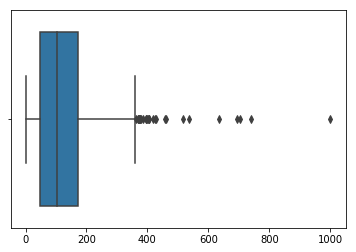

In [62]:
sns.boxplot(indexeddataset)

In [63]:
avg = indexeddataset.values.mean()
for i in range(715):
    if indexeddataset.values[i][0]>310:
        indexeddataset.values[i][0] = avg

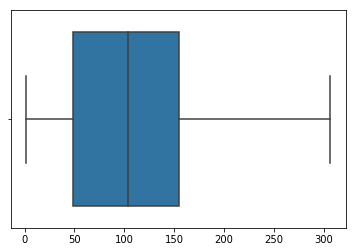

In [64]:
sns.boxplot(indexeddataset)

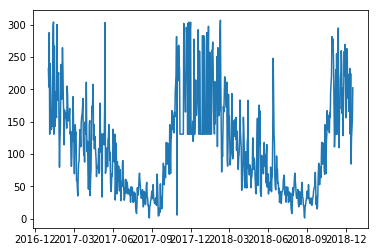

In [65]:
plt.plot(indexeddataset)

In [66]:
#detecting rolling statistics
rollmean = indexeddataset.rolling(window =24).mean()
rollstd = indexeddataset.rolling(window =24).std()

#print(rollmean,rollstd)

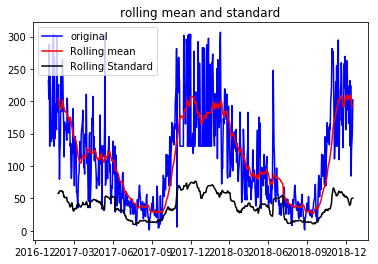

In [67]:
#plotting rolling statistics
orig = plt.plot(indexeddataset ,color ='blue', label ='original')
mean = plt.plot(rollmean, color='red', label='Rolling mean')
std = plt.plot(rollstd, color='black', label='Rolling Standard')
plt.legend(loc='best')
plt.title("rolling mean and standard")
plt.show(block=False)

In [68]:
from statsmodels.tsa.stattools import adfuller

print("Results of dickey-fuller-test")
dftest = adfuller(indexeddataset['PM2_5'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['test statistics','p-value','#lagsused','number of obeservations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key] = value
    
print(dfoutput)

Results of dickey-fuller-test
test statistics                  -2.229273
p-value                           0.195793
#lagsused                         9.000000
number of obeservations used    706.000000
critical value (1%)              -3.439646
critical value (5%)              -2.865643
critical value (10%)             -2.568955
dtype: float64


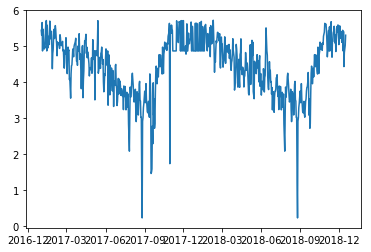

In [69]:
indexeddataset_logscale = np.log(indexeddataset)
plt.plot(indexeddataset_logscale)

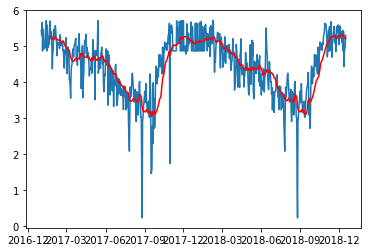

In [70]:
movingaverage = indexeddataset_logscale.rolling(window=24).mean()
movingstd = indexeddataset_logscale.rolling(window=24).std()
plt.plot(indexeddataset_logscale)
plt.plot(movingaverage,color='red')

In [71]:
datasetlogscaleminusmovingaverage = indexeddataset_logscale - movingaverage
datasetlogscaleminusmovingaverage.head(30)

datasetlogscaleminusmovingaverage.dropna(inplace=True)
datasetlogscaleminusmovingaverage.head(30)

,PM2_5
Date,
2017-01-24,0.119889
2017-01-25,0.140919
2017-01-26,-0.345952
2017-01-27,-0.829839
2017-01-28,-0.400660
2017-01-29,-0.262848
2017-01-30,0.120802
2017-01-31,0.274303
2017-02-01,0.005953


In [80]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #determine rolling stats
    movingaverage = timeseries.rolling(window=24).mean()
    movingstd = timeseries.rolling(window=24).std()
    
    #plotting rolling statistics
    orig = plt.plot(timeseries ,color ='blue', label ='original')
    mean = plt.plot(movingaverage, color='red', label='Rolling mean')
    std = plt.plot(movingstd, color='black', label='Rolling Standard')
    plt.legend(loc='best')
    plt.title("rolling mean and standard")
    plt.show(block=False)
    
    #perform dickey fuller test
    print("Results of dickey-fuller-test")
    dftest = adfuller(timeseries['PM2_5'],autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['test statistics','p-value','#lagsused','number of obeservations used'])
    for key,value in dftest[4].items():
        dfoutput['critical value (%s)'%key] = value
    
    print(dfoutput)

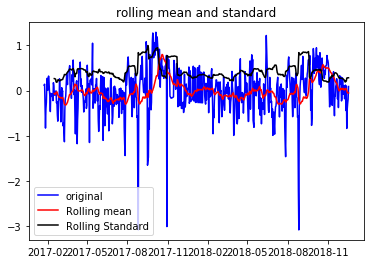

Results of dickey-fuller-test
test statistics                -1.406108e+01
p-value                         3.055758e-26
#lagsused                       0.000000e+00
number of obeservations used    6.920000e+02
critical value (1%)            -3.439835e+00
critical value (5%)            -2.865726e+00
critical value (10%)           -2.568999e+00
dtype: float64


In [81]:
test_stationary(datasetlogscaleminusmovingaverage)

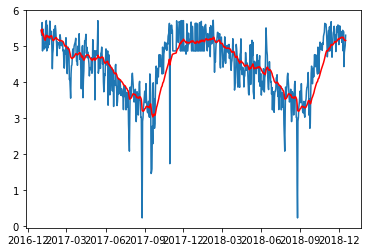

In [82]:
exponentialDecayweightedaverage = indexeddataset_logscale.ewm(halflife=12, min_periods=0,adjust=True).mean()
plt.plot(indexeddataset_logscale)
plt.plot(exponentialDecayweightedaverage,color='Red')

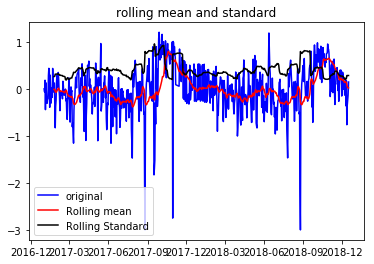

Results of dickey-fuller-test
test statistics                -1.396717e+01
p-value                         4.411532e-26
#lagsused                       0.000000e+00
number of obeservations used    7.150000e+02
critical value (1%)            -3.439529e+00
critical value (5%)            -2.865591e+00
critical value (10%)           -2.568927e+00
dtype: float64


In [83]:
datasetlogscaleminusmovingexponantialdecayaverage = indexeddataset_logscale - exponentialDecayweightedaverage                
test_stationary(datasetlogscaleminusmovingexponantialdecayaverage)

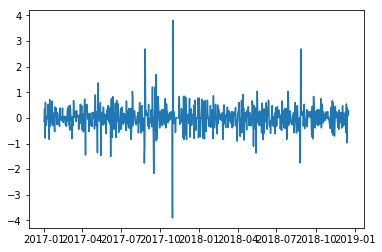

In [84]:
datasetlogdiffshifitng = indexeddataset_logscale - indexeddataset_logscale.shift()             
plt.plot(datasetlogdiffshifitng)

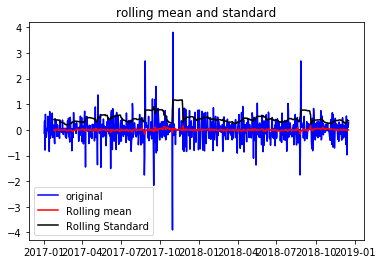

Results of dickey-fuller-test
test statistics                -1.254928e+01
p-value                         2.224430e-23
#lagsused                       1.100000e+01
number of obeservations used    7.030000e+02
critical value (1%)            -3.439686e+00
critical value (5%)            -2.865660e+00
critical value (10%)           -2.568964e+00
dtype: float64


In [85]:
datasetlogdiffshifitng.dropna(inplace=True)
test_stationary(datasetlogdiffshifitng)

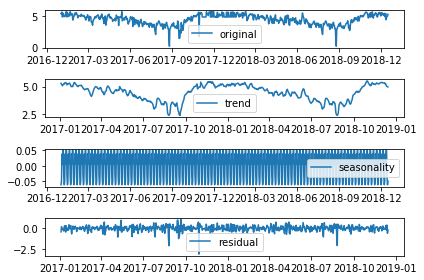

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexeddataset_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexeddataset_logscale,label ='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal,label="seasonality")
plt.legend(loc ='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc ='best')
plt.tight_layout()


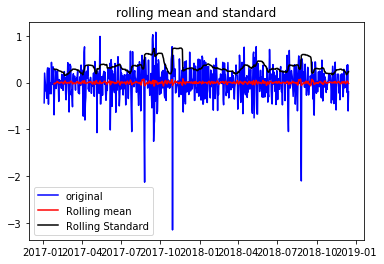

Results of dickey-fuller-test
test statistics                -1.150152e+01
p-value                         4.479561e-21
#lagsused                       2.000000e+01
number of obeservations used    6.890000e+02
critical value (1%)            -3.439877e+00
critical value (5%)            -2.865744e+00
critical value (10%)           -2.569009e+00
dtype: float64


In [87]:
decomposedlogdata = residual
decomposedlogdata.dropna(inplace= True)
test_stationary(decomposedlogdata)

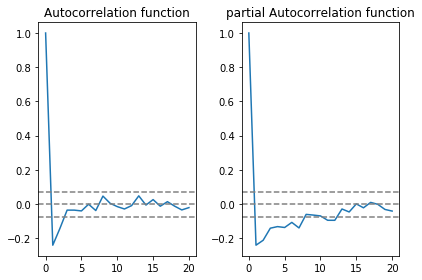

In [88]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetlogdiffshifitng, nlags=20)
lag_pacf = pacf(datasetlogdiffshifitng, nlags=20 ,method='ols')




#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifitng)),linestyle='--',color='gray')  
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifitng)),linestyle='--',color='gray')
plt.title('Autocorrelation function')


#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifitng)),linestyle='--',color='gray')  
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifitng)),linestyle='--',color='gray')
plt.title('partial Autocorrelation function')
plt.tight_layout()

plotting AR model


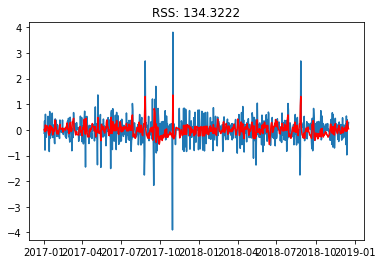

In [99]:
from statsmodels.tsa.arima_model import ARIMA

#AR model 
model = ARIMA(indexeddataset_logscale,order=(3,1,2))
results_ar = model.fit(disp=-1)
plt.plot(datasetlogdiffshifitng)
plt.plot(results_ar.fittedvalues,color='red')
plt.title("RSS: %.4f"% sum((results_ar.fittedvalues-datasetlogdiffshifitng["PM2_5"])**2))
print("plotting AR model")